In [16]:
import pandas as pd
from sklearn import datasets

df_array = datasets.load_boston()

In [17]:
#convert to pandas
import numpy as np
# features
df = pd.DataFrame(df_array.data)
df.columns = df_array.feature_names
# target
df['target'] = df_array.target


In [18]:
# for further processing, if an array is needed
target_array = df['target'].values

In [19]:
# What to do with categorical data? Sometimes making these can simplify the analysis.
# have to make artificial categories for this dataset
# this makes a variable 'class' based off of Age.
def label_AGE (row):
    if row['AGE'] < 40:
        return "young"
    else:
        return 'old'
df['class'] = df.apply(lambda row: label_AGE (row),axis=1)

In [20]:
# Dimensions
df.shape

(506, 15)

In [21]:
# head, always a good one
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,class
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,old
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,old
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,old
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,old
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,old
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7,old
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9,old
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1,old
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5,old
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9,old


In [22]:
# summary statistics
# excludes categorical variables
# note 'class' excluded for this reason
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [25]:
# may want to check for imbalanced classes
# useful if there are only a few target categories
# in this dataset, not super useful
df.groupby('target').size().head(10)

target
5.0    2
5.6    1
6.3    1
7.0    2
7.2    3
7.4    1
7.5    1
8.1    1
8.3    2
8.4    2
dtype: int64

In [26]:
df.groupby('class').size()

class
old      398
young    108
dtype: int64

In [30]:
# does something similar
df['class'].value_counts()

old      398
young    108
Name: class, dtype: int64

In [59]:
# if you have many categorical variables, it might help to see if some are misspelled
set(df['class'])

{'old', 'young'}

In [27]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
target     506 non-null float64
class      506 non-null object
dtypes: float64(14), object(1)
memory usage: 59.4+ KB


In [34]:
# missing data by column
len(df.index)-df.count()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
class      0
dtype: int64

In [35]:
# subset for only data that is present (remove all lines where 'class' is NA)
df[df['class'].notnull()].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,class
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,old
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,old
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,old
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,old
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,old


In [58]:
# remove outliers for a specific column
# be sure to specify the quantile. The cutoff is up to you.
upper = df['TAX'].quantile(0.99) ; print(upper)
lower = df['TAX'].quantile(0.01) ; print(lower)
df[((df['TAX'] > lower) & (df['TAX'] < upper))].head()

666.0
188.0


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,class
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,old
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,old
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,old
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,old
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,old


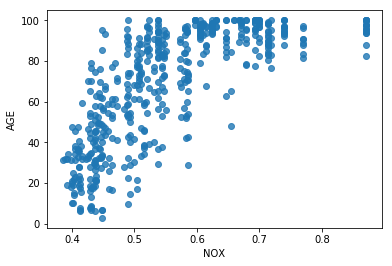

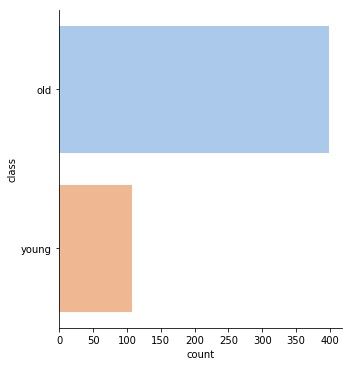

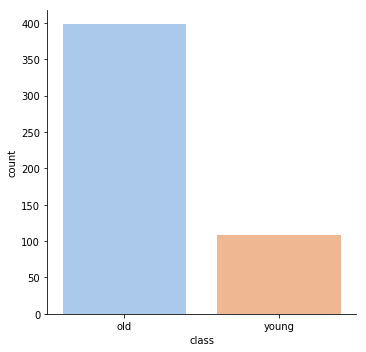

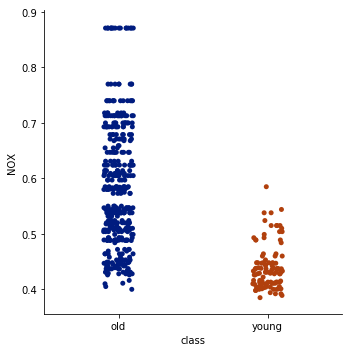

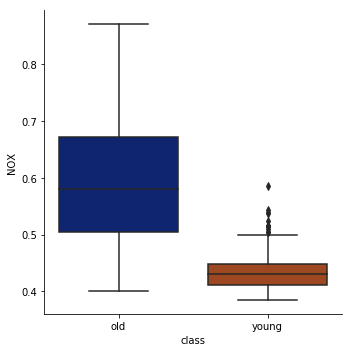

In [13]:
#quick visualization
import seaborn as sns
import matplotlib.pyplot as plt

# everything
# sns.pairplot(df, kind="scatter")

# basic scatterplot - both continous
sns.regplot(x=df["NOX"], y=df["AGE"], fit_reg=False)

# basic counts-by-category
sns.catplot(y="class", kind="count", palette="pastel", data=df)
sns.catplot(x="class", kind="count", palette="pastel", data=df)

# continuous and categorical
sns.catplot(x="class", y="NOX", palette="dark", data=df)
sns.catplot(x="class", y="NOX", palette="dark", data=df, kind='box')

TypeError: 'type' object is not subscriptable